In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use("fivethirtyeight")
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

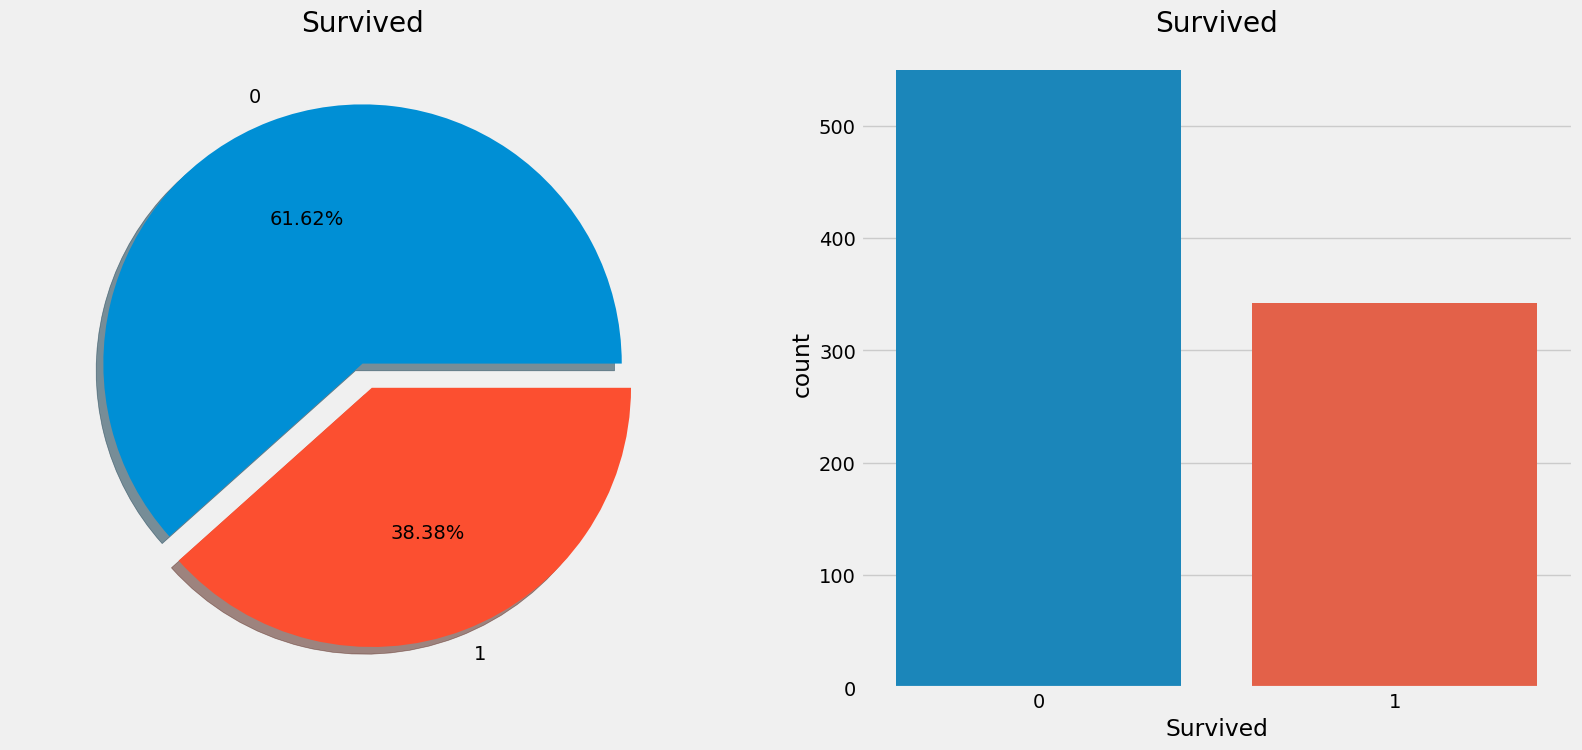

In [5]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data["Survived"].value_counts().plot.pie(explode = [0, 0.1], shadow = True, autopct = "%1.2f%%", ax = ax[0])
ax[0].set_ylabel(" ")
ax[0].set_title("Survived")
sns.countplot(data = data, x = 'Survived', ax = ax[1])
ax[1].set_title("Survived")
plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

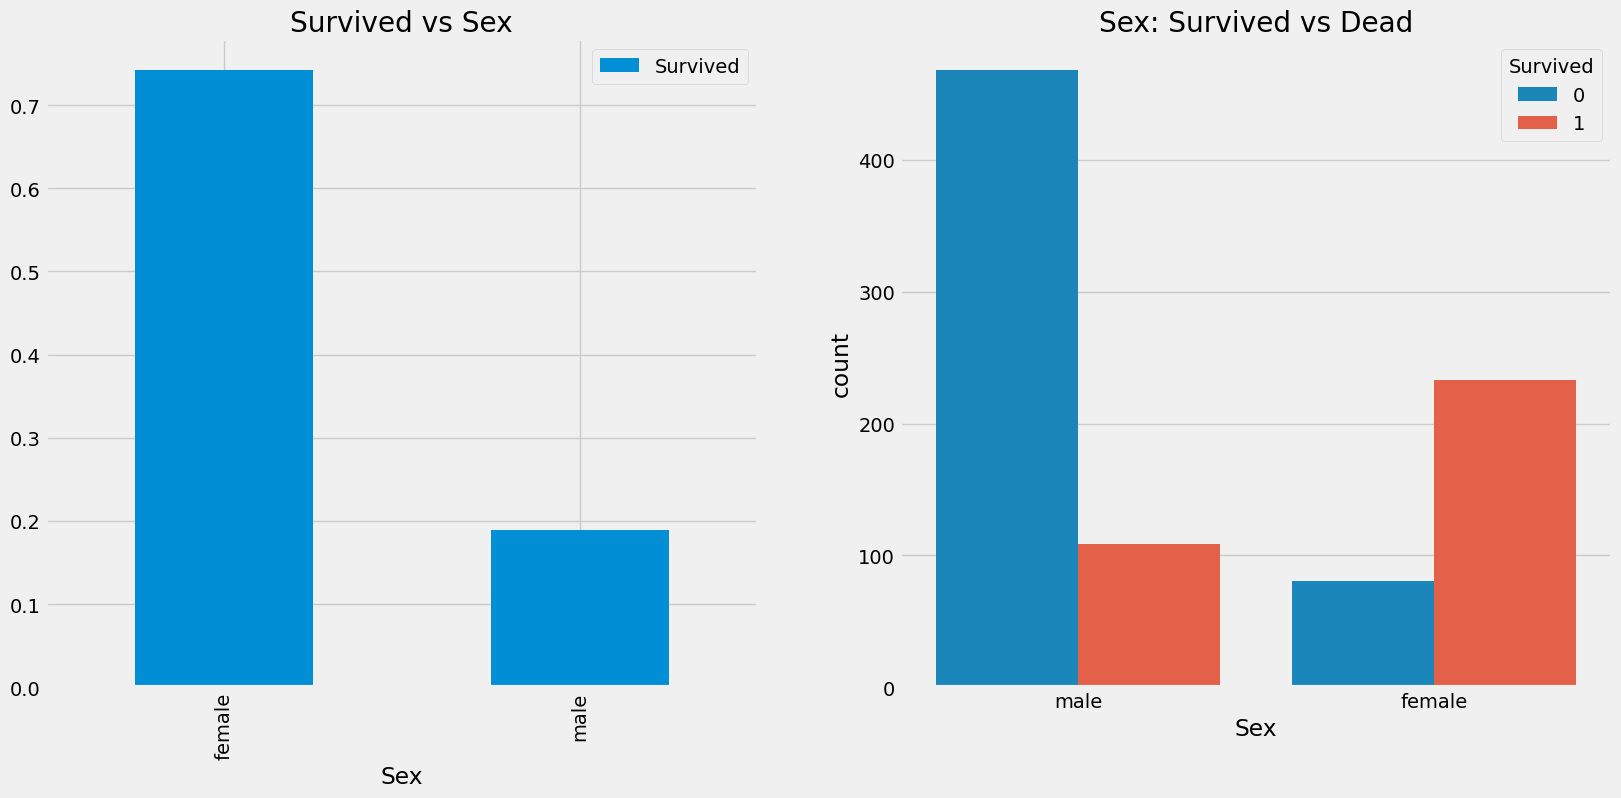

In [7]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data = data, x = 'Sex', hue = 'Survived', ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


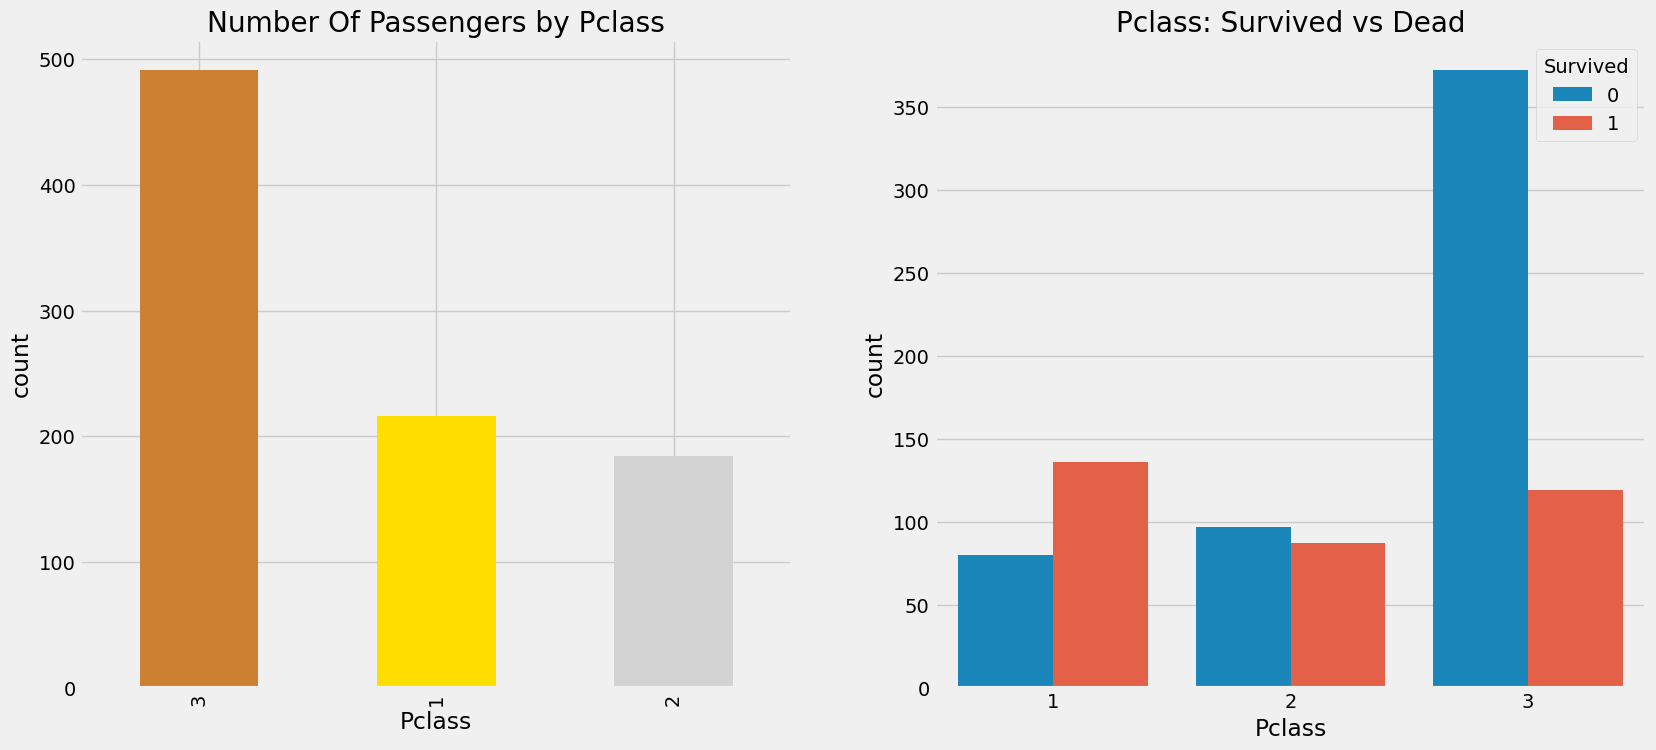

In [9]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(ax = ax[0], color = ['#CD7F32','#FFDF00','#D3D3D3'])
ax[0].set_ylabel('count')
ax[0].set_title('Number Of Passengers by Pclass')
sns.countplot(data = data, x = 'Pclass', hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

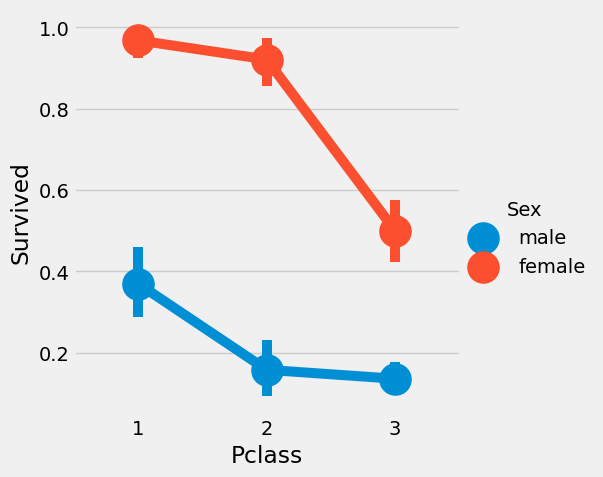

In [11]:
sns.catplot(x = 'Pclass',y = 'Survived', hue = 'Sex', data = data, kind = 'point')
plt.show()

In [12]:
print('Oldest Passenger was of:', data.Age.max(), 'Years')
print('Youngest Passenger was of:', data.Age.min(), 'Years')
print('Average Age of the ship:', data.Age.mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age of the ship: 29.69911764705882 Years


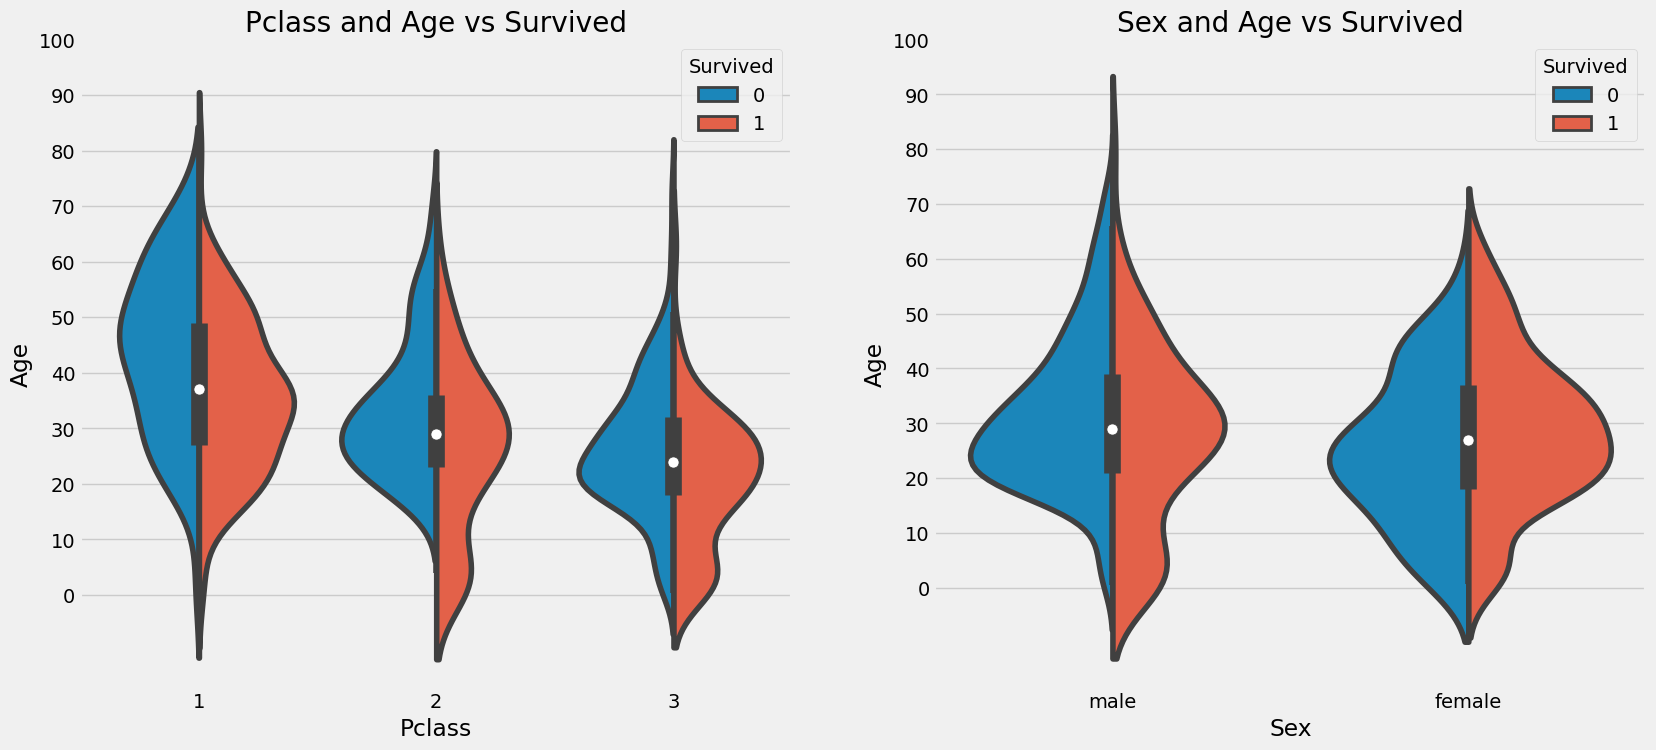

In [13]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot(x = 'Pclass', y = 'Age', data = data, split = True, hue = 'Survived', ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([a-zA-Z]+)\.')
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                       inplace = True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [18]:
data.Age.isnull().any()

False

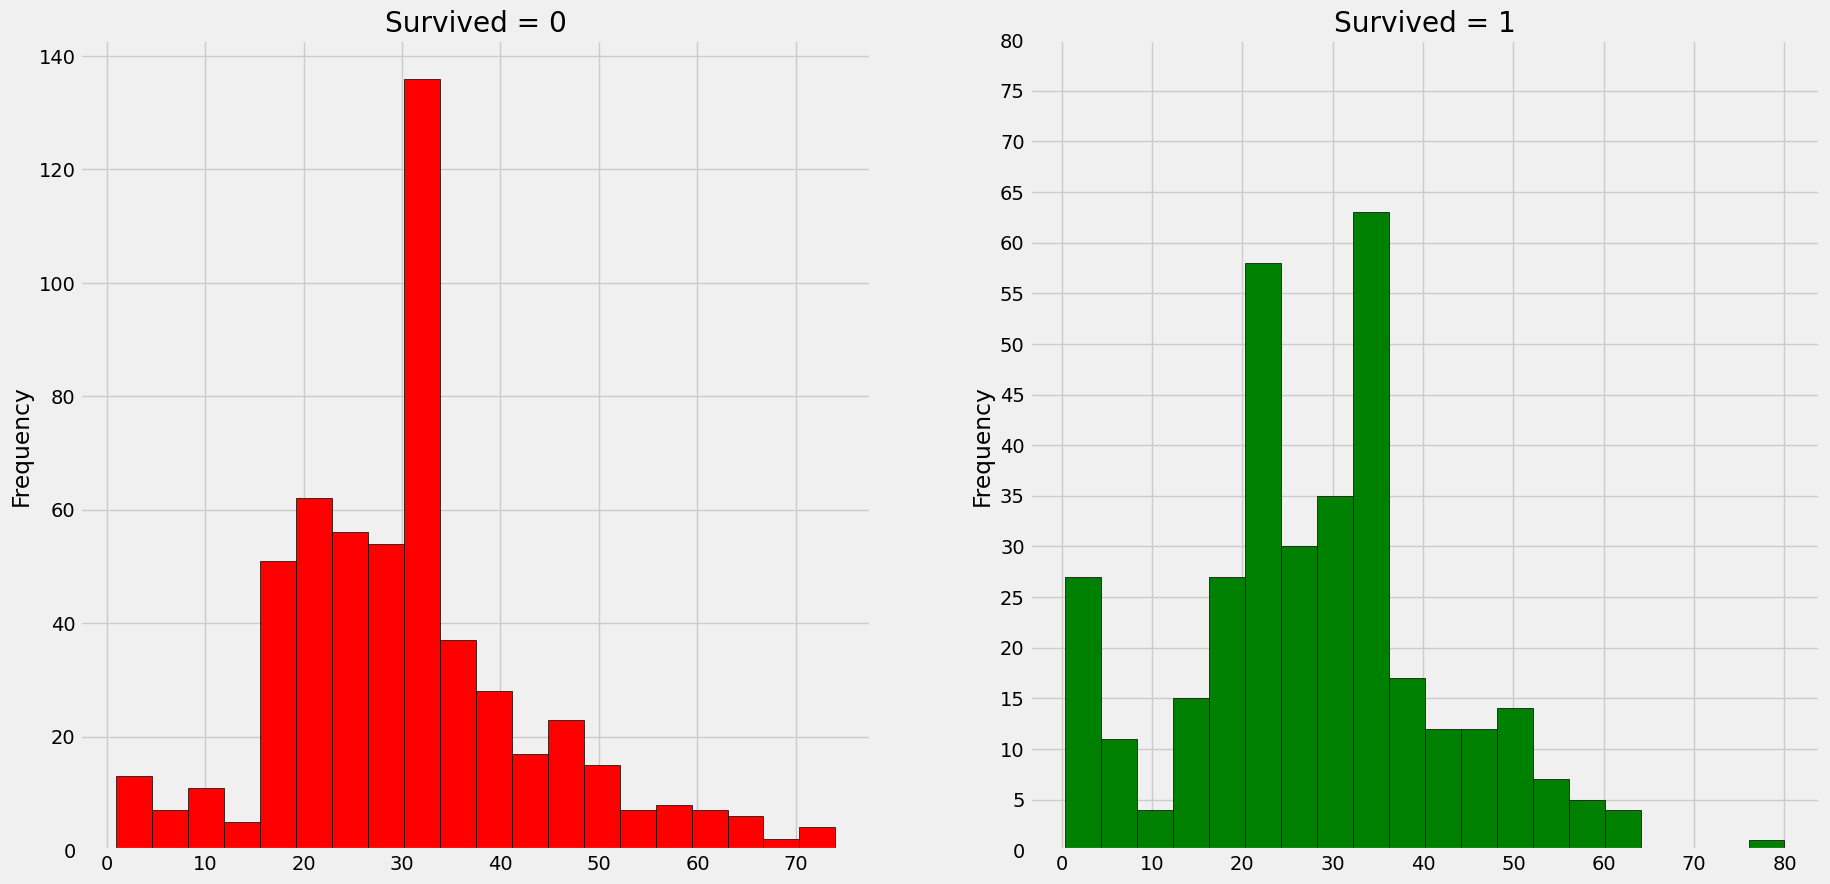

In [19]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, color = 'red', edgecolor = 'black')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 160, 20))
ax[0].set_yticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, color = 'green', edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_yticks(x2)
plt.show()

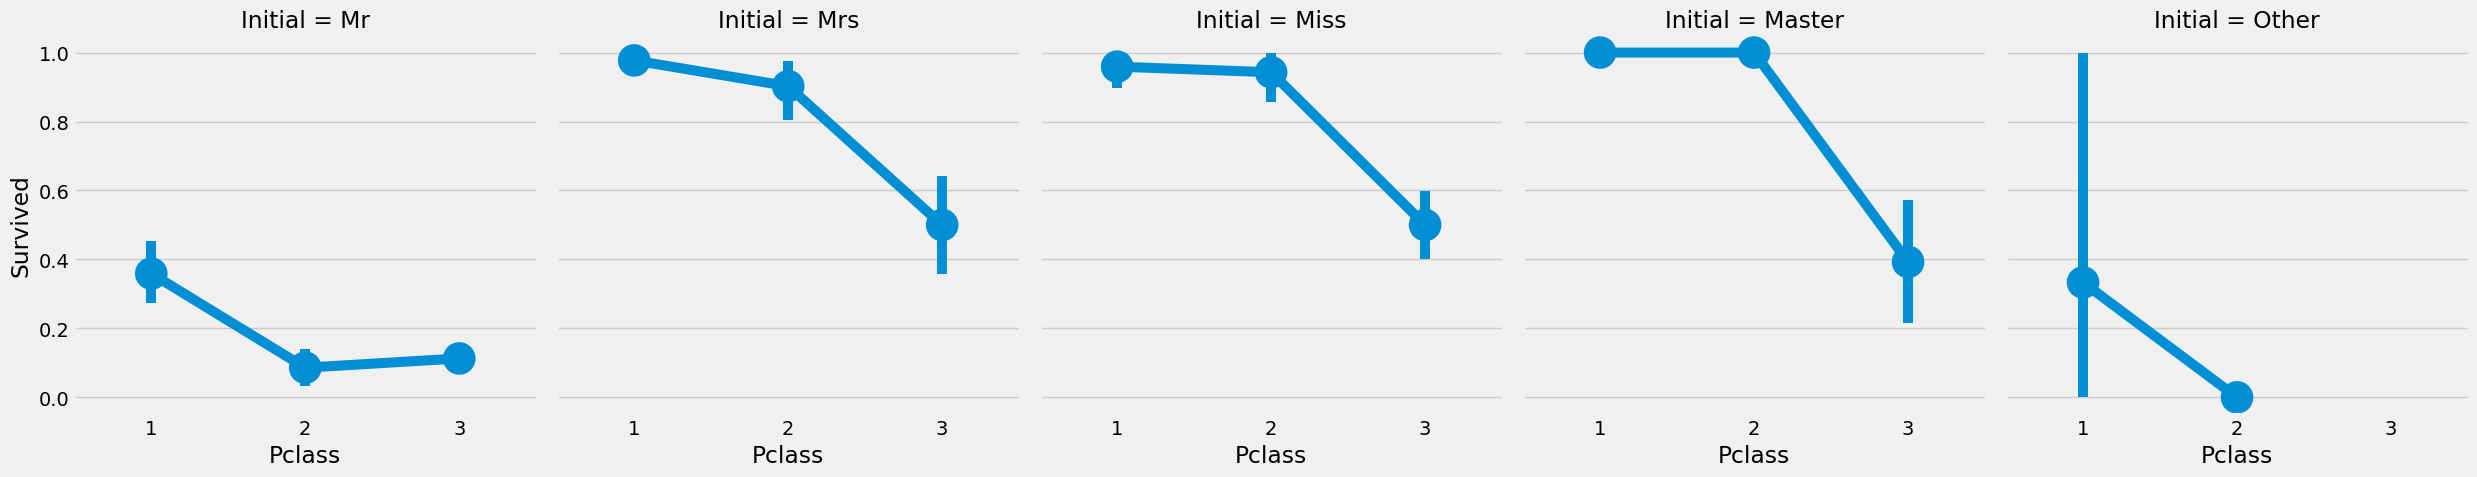

In [20]:
sns.catplot(x = 'Pclass', y = 'Survived', data = data, col = 'Initial', kind = 'point')
plt.show()

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient('summer_r')

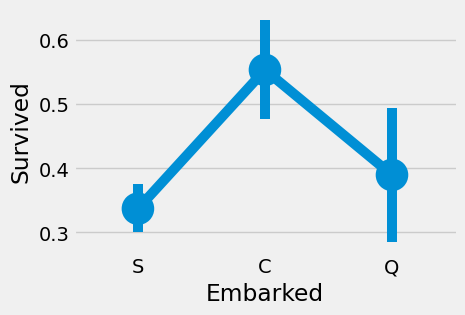

In [22]:
sns.catplot(x = 'Embarked', y = 'Survived', data = data, kind = 'point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

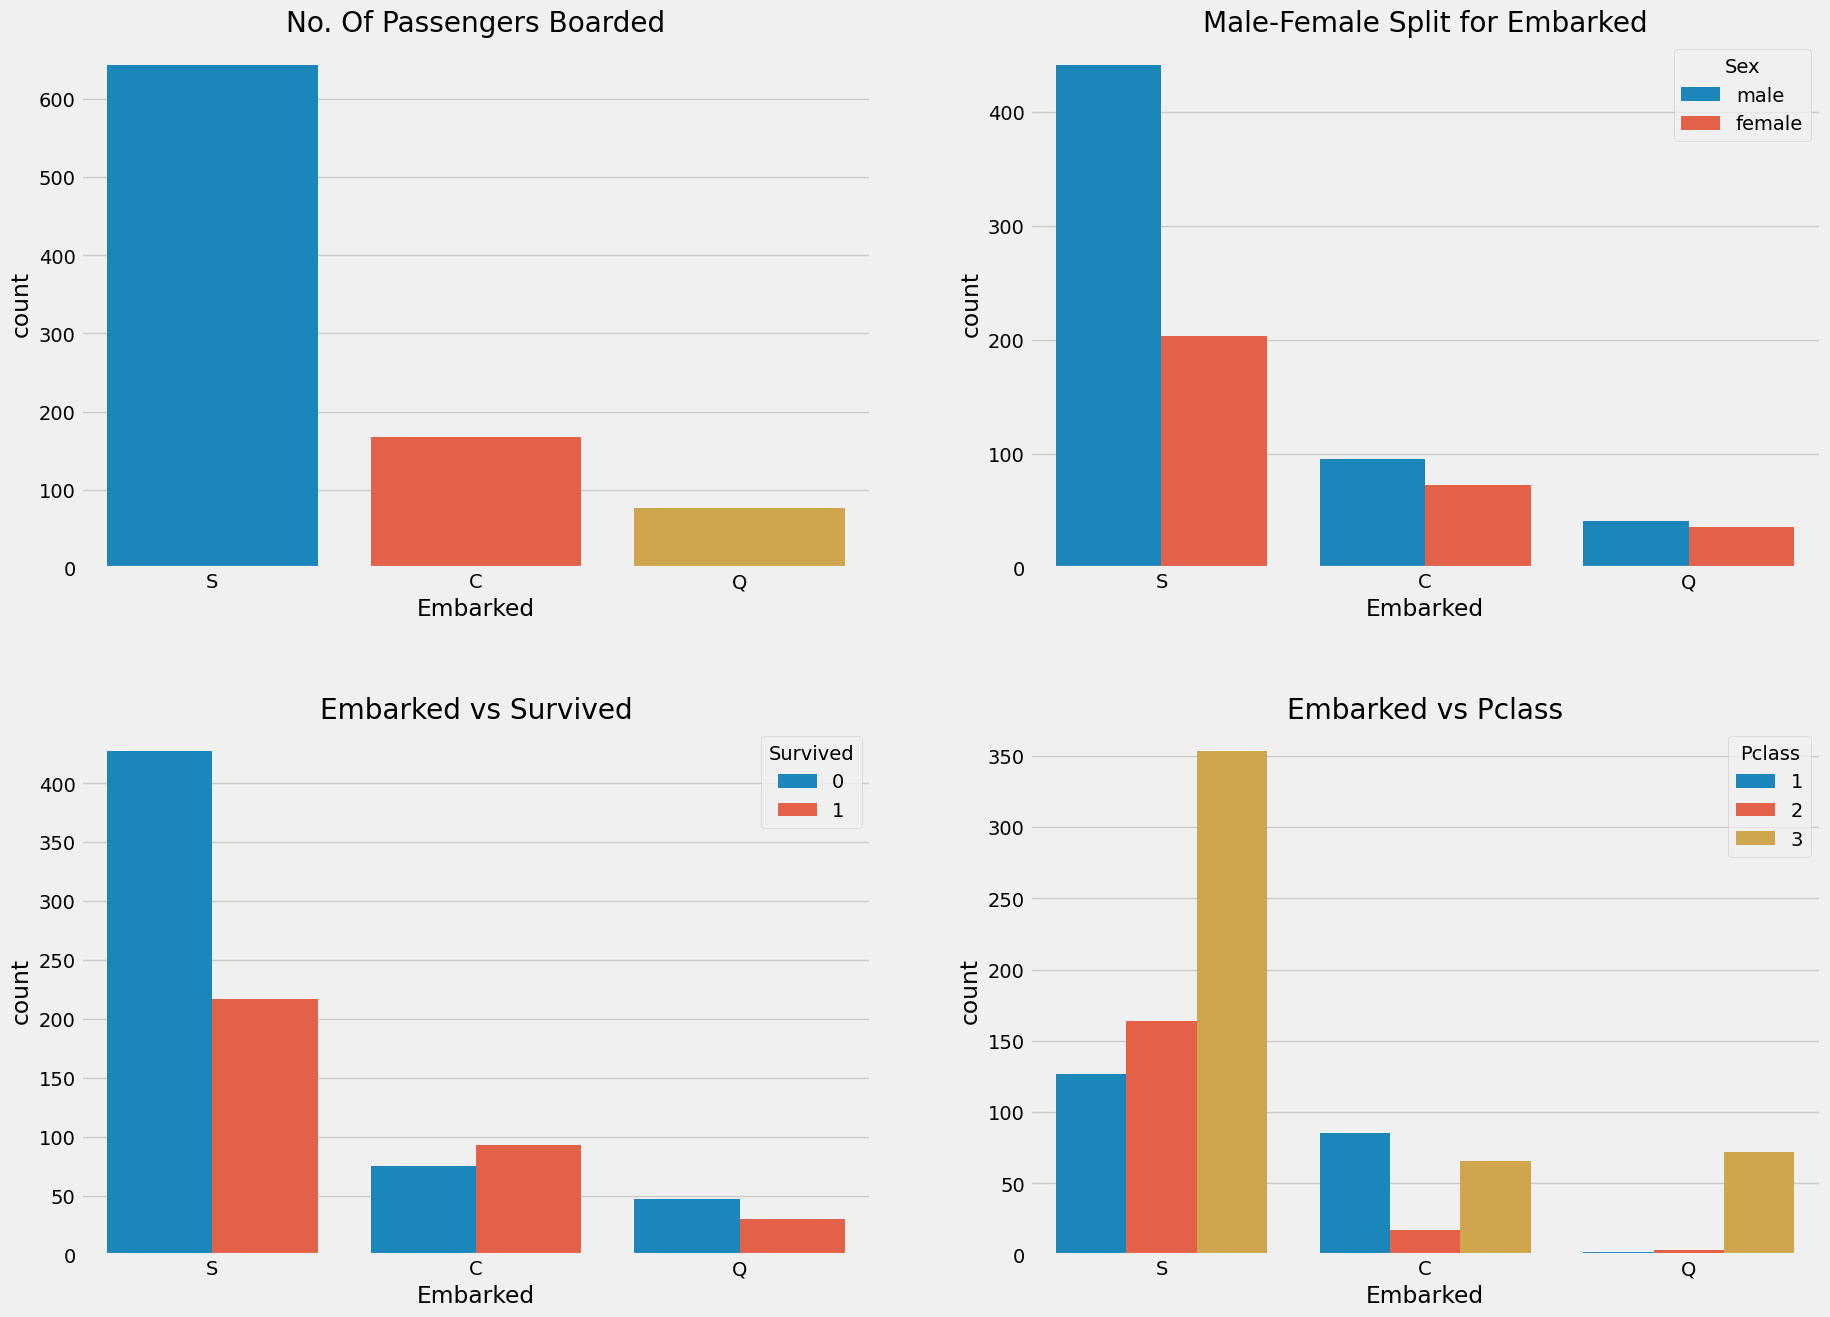

In [23]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot(x = 'Embarked', data = data, ax = ax[0, 0])
ax[0, 0].set_title("No. Of Passengers Boarded")
sns.countplot(x = 'Embarked', data = data, hue = 'Sex', ax = ax[0, 1])
ax[0, 1].set_title("Male-Female Split for Embarked")
sns.countplot(x = 'Embarked', data = data, hue = 'Survived', ax = ax [1, 0])
ax[1, 0].set_title("Embarked vs Survived")
sns.countplot(x = 'Embarked', data = data, hue = 'Pclass', ax = ax[1, 1])
ax[1, 1].set_title("Embarked vs Pclass")
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

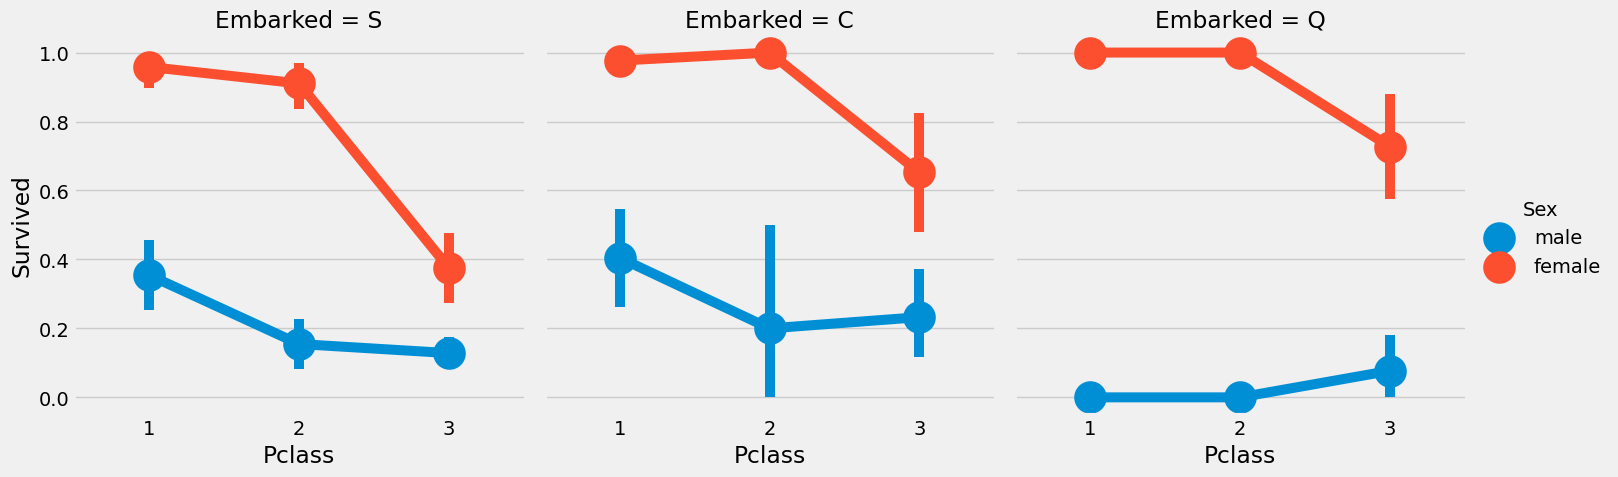

In [24]:
sns.catplot(x = 'Pclass', y = 'Survived', data = data, col = 'Embarked', hue = 'Sex', kind = 'point')
plt.show()

In [25]:
data.Embarked.fillna('S', inplace = True)

In [26]:
data.Embarked.isnull().any()

False

In [27]:
pd.crosstab(data.SibSp, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


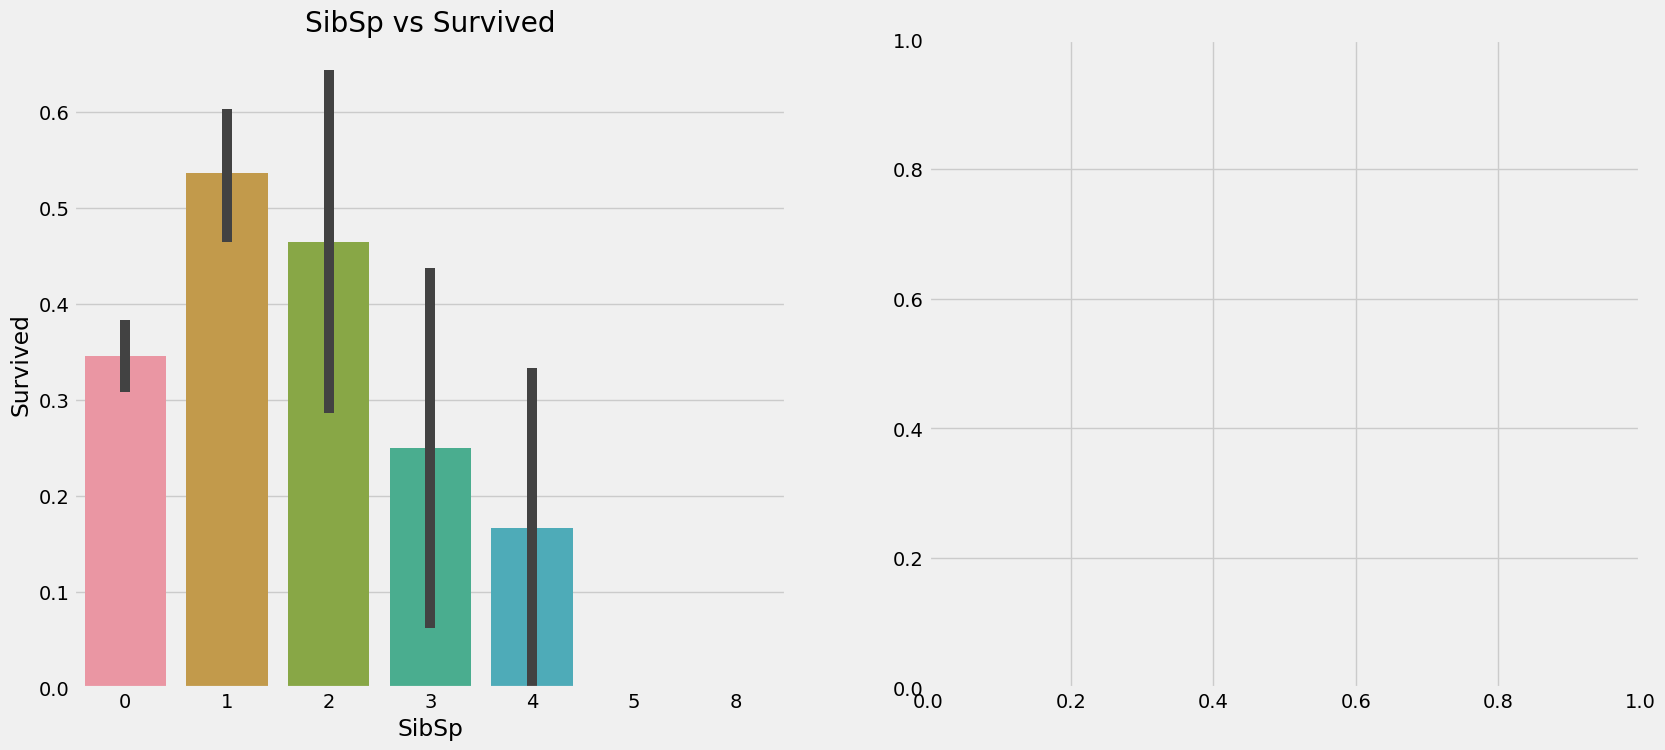

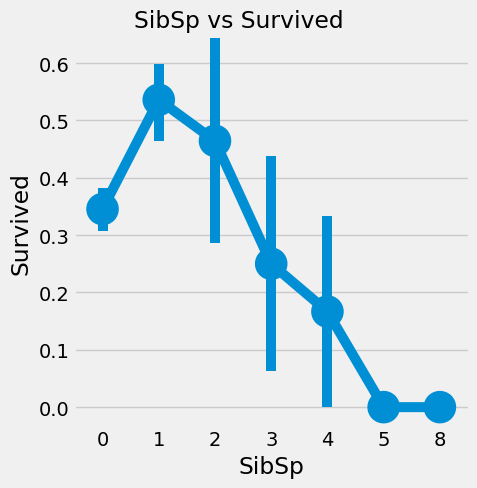

In [28]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.barplot(x = 'SibSp', y = 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x = 'SibSp', y = 'Survived', data = data, kind = 'point')
ax[1] = plt.gcf()
ax[1].suptitle('SibSp vs Survived')
plt.show()

In [29]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [30]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

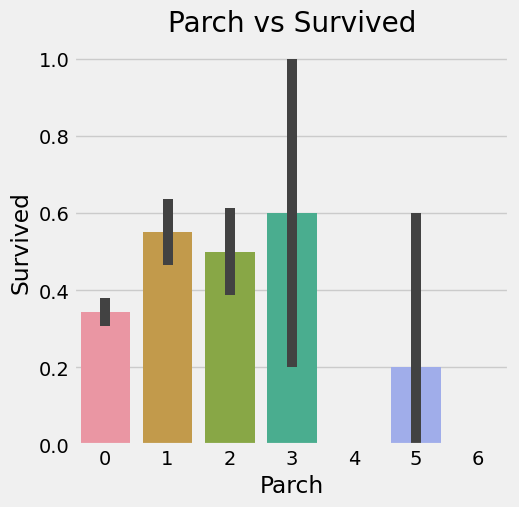

In [31]:
fig = plt.figure(figsize = (5, 5))
fig = sns.barplot(x = 'Parch', y = 'Survived', data = data)
fig.set_title('Parch vs Survived')

Text(0.5, 0.98, 'Parch vs Survived')

<Figure size 500x500 with 0 Axes>

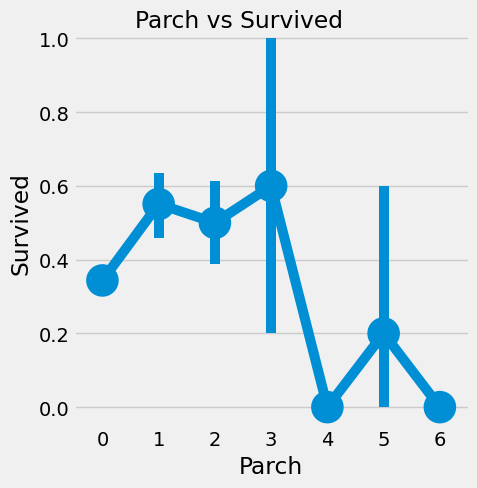

In [32]:
fig = plt.figure(figsize = (5, 5))
fig = sns.catplot(x = 'Parch', y = 'Survived', data = data, kind = 'point')
fig = plt.gcf()
fig.suptitle('Parch vs Survived')

In [33]:
print('Highest Fare was:', data.Fare.max())
print('Lowest Fare was:', data.Fare.min())
print('Average Fare was:', data.Fare.mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


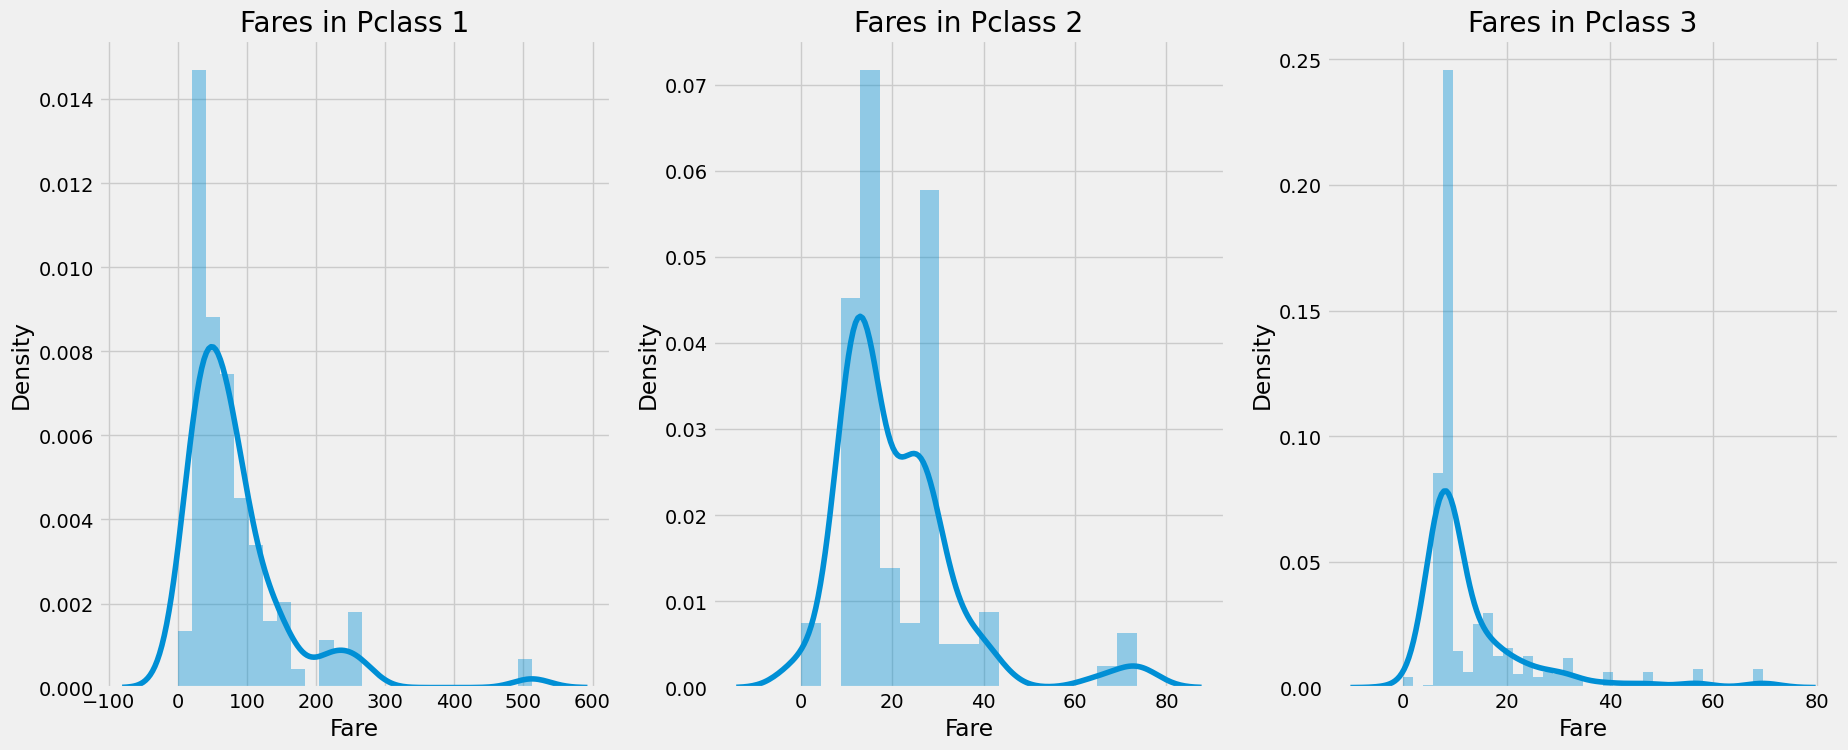

In [34]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

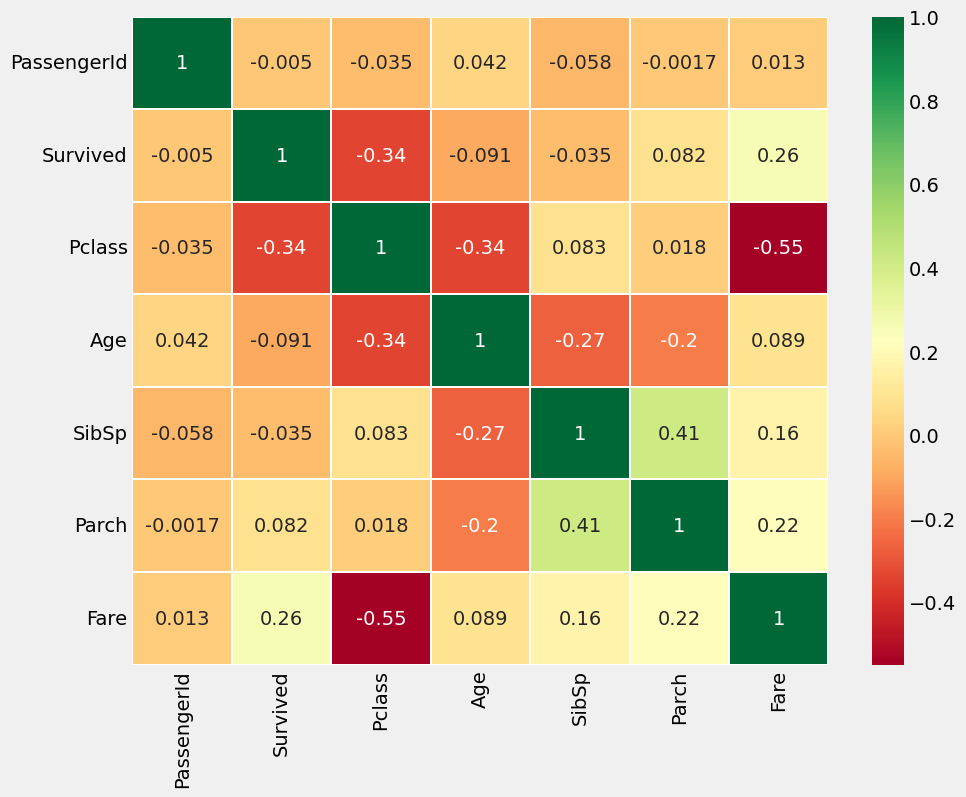

In [35]:
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [36]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[(data['Age'] > 64), 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


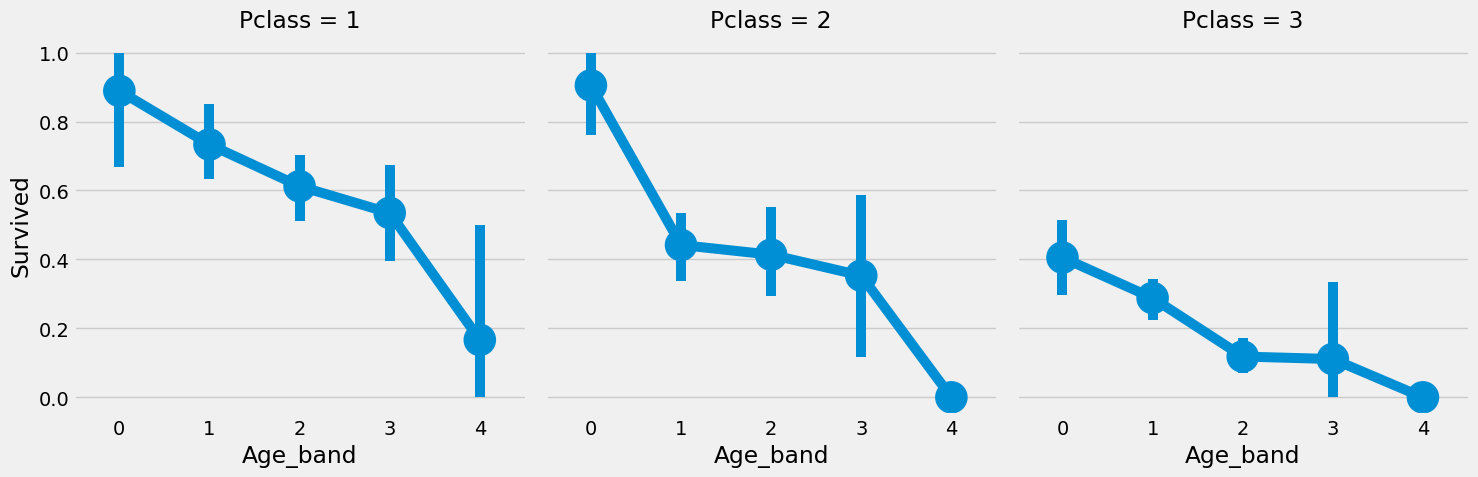

In [38]:
sns.catplot(x = 'Age_band', y = 'Survived', col = 'Pclass', data = data, kind = 'point')
plt.show()

In [39]:
data['Family_Size'] = 0
data['Family_Size'] = data['SibSp'] + data['Parch']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

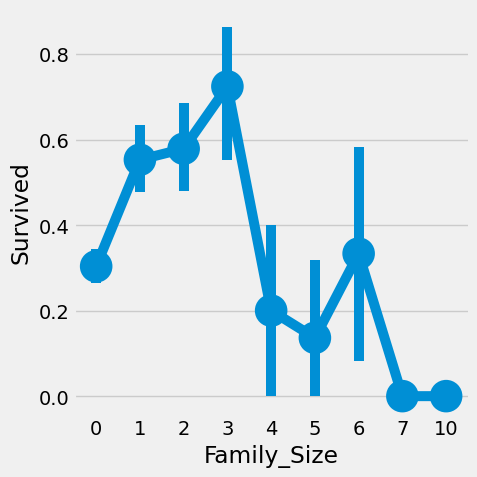

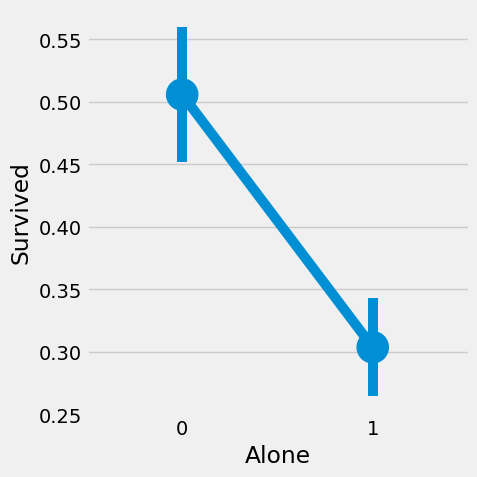

In [40]:
fig1 = sns.catplot(x = 'Family_Size', y = 'Survived', data = data, kind = 'point')
fig1.set_titles('Family_Size vs Survived')
fig2 = sns.catplot(x = 'Alone', y = 'Survived', data = data, kind = 'point')
fig2.set_titles('Alone vs Survived')

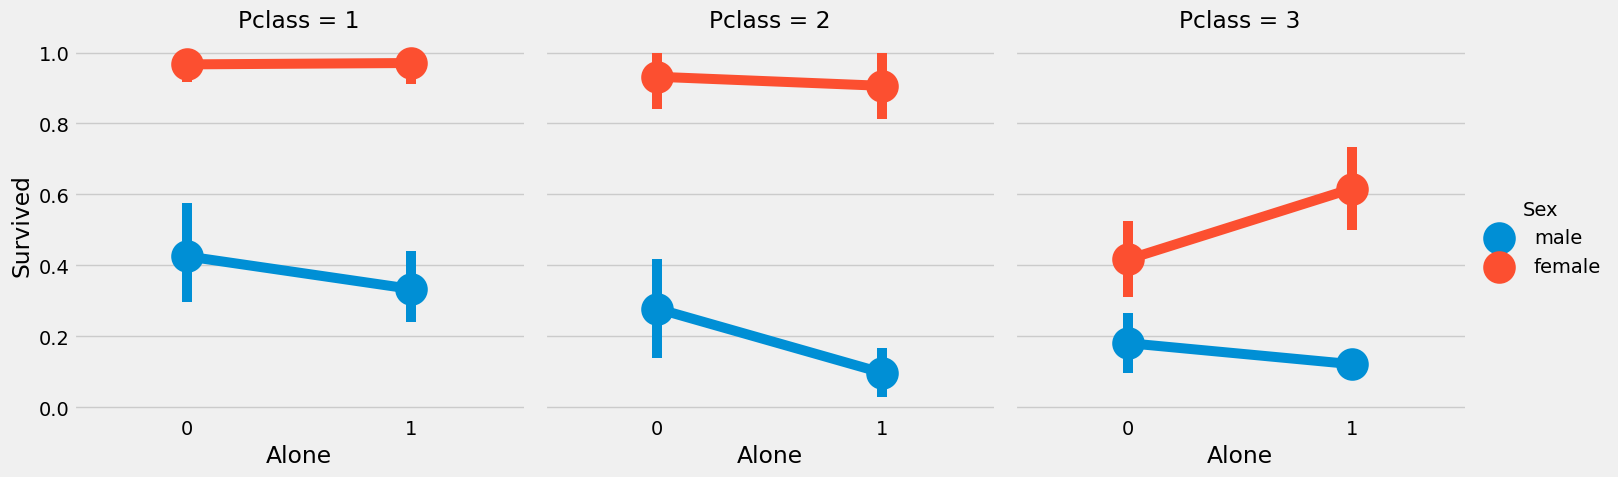

In [41]:
sns.catplot(x = 'Alone', y = 'Survived', hue = 'Sex', col = 'Pclass', kind = 'point', data = data)
plt.show()

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby('Fare_Range')['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] <= 14.454) & (data['Fare'] > 7.91), 'Fare_cat'] = 1
data.loc[(data['Fare'] <= 31) & (data['Fare'] > 14.454), 'Fare_cat'] = 2
data.loc[(data['Fare'] <= 512.329) & (data['Fare'] > 31), 'Fare_cat'] = 3

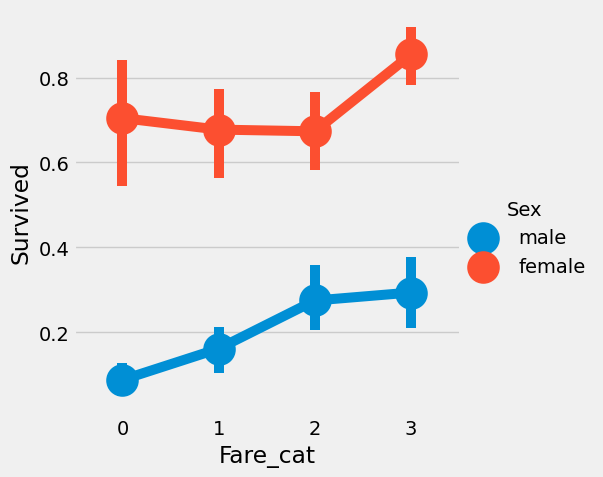

In [44]:
sns.catplot(x = 'Fare_cat', y = 'Survived', data = data, hue = 'Sex', kind = 'point')
plt.show()

In [45]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)

In [46]:
data.drop(['Name', 'Age',  'Ticket', 'Fare', 'Cabin', 'PassengerId', 'Fare_Range'], axis = 1, inplace = True)

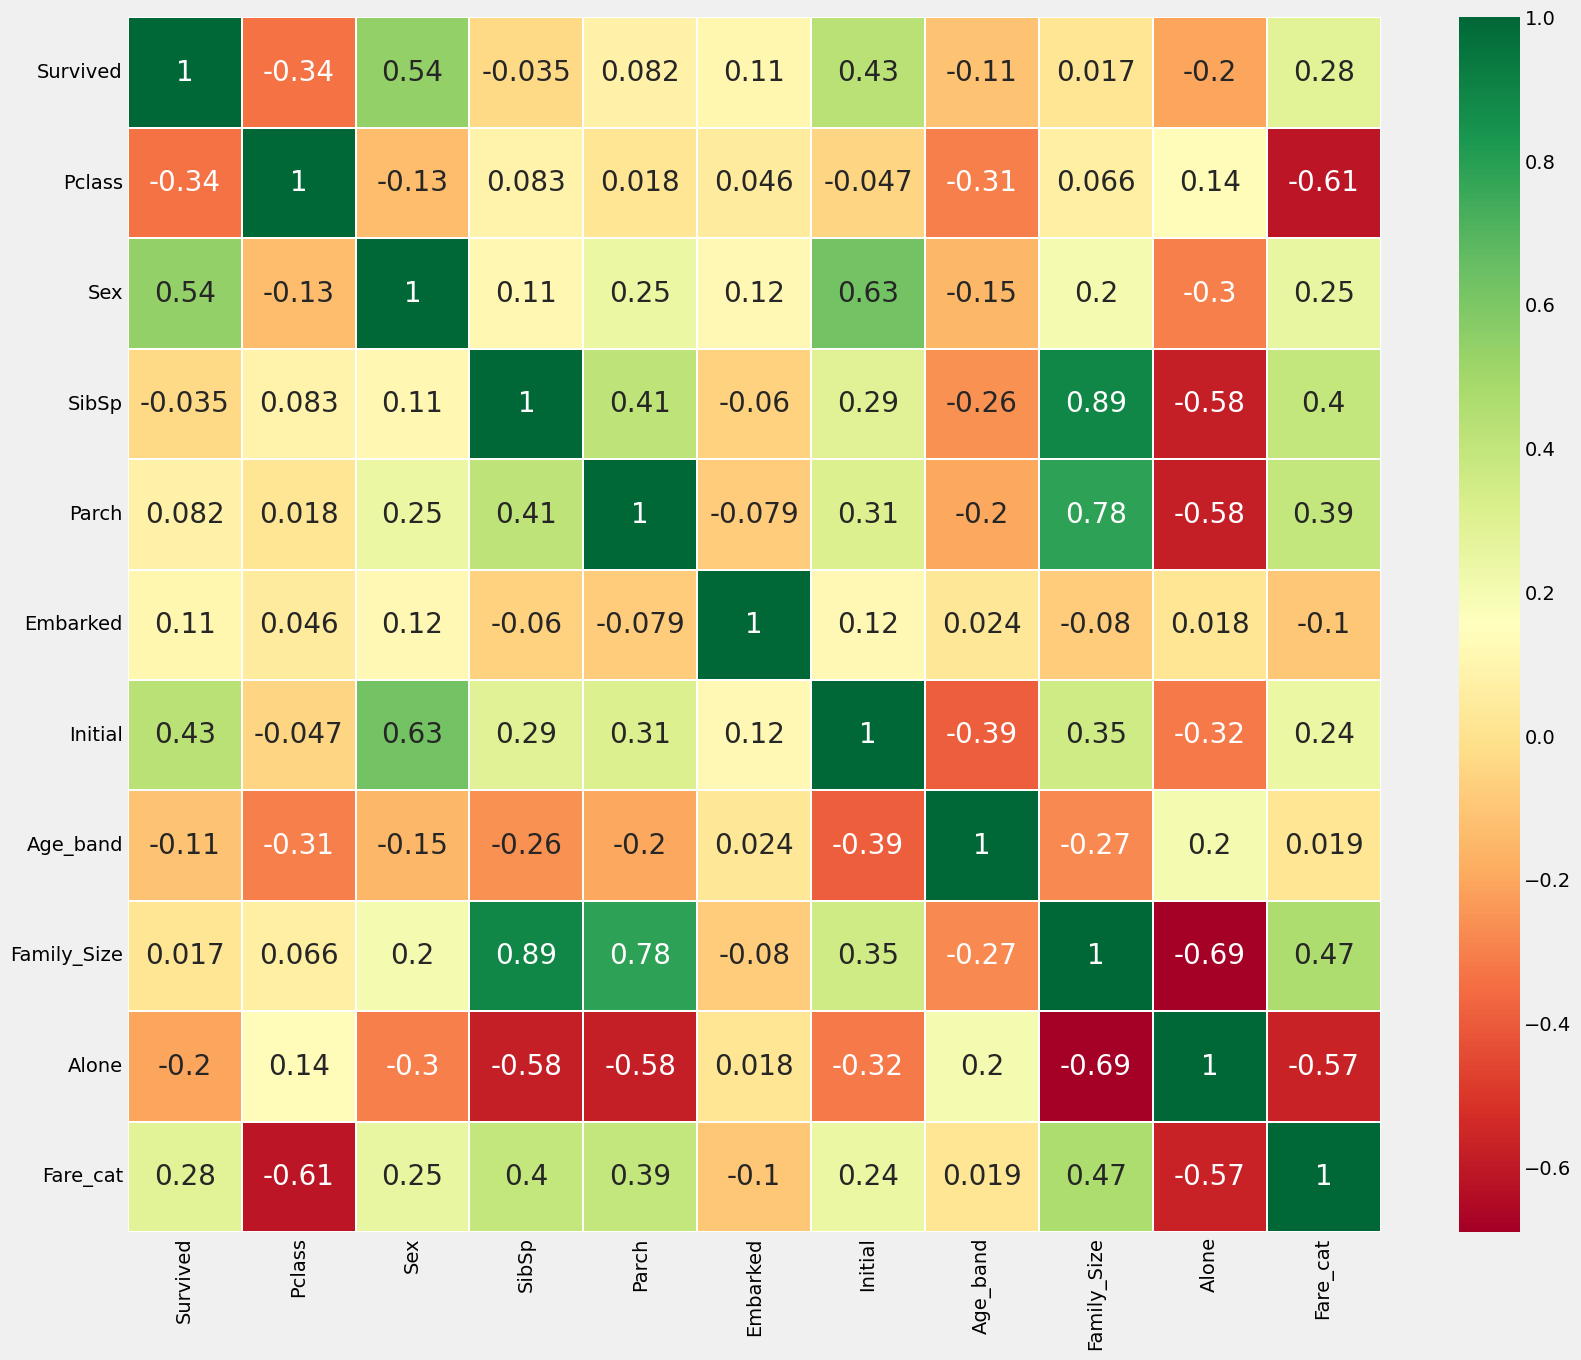

In [47]:
sns.heatmap(data.corr(numeric_only = True), cmap = 'RdYlGn', linewidths = 0.2, annot = True, annot_kws = {'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [58]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is:', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is: 0.835820895522388


In [64]:
model = svm.SVC(kernel = 'linear', C = 0.1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM:', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM: 0.8171641791044776


In [65]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy of the Logistic Regression is:', metrics.accuracy_score(prediction3, test_Y))

Accuracy of the Logistic Regression is: 0.8208955223880597


In [68]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy of the Decision Tree is:', metrics.accuracy_score(prediction4, test_Y))

Accuracy of the Decision Tree is: 0.7985074626865671


In [69]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy of the KNN is:', metrics.accuracy_score(prediction5, test_Y))

Accuracy of the KNN is: 0.8134328358208955


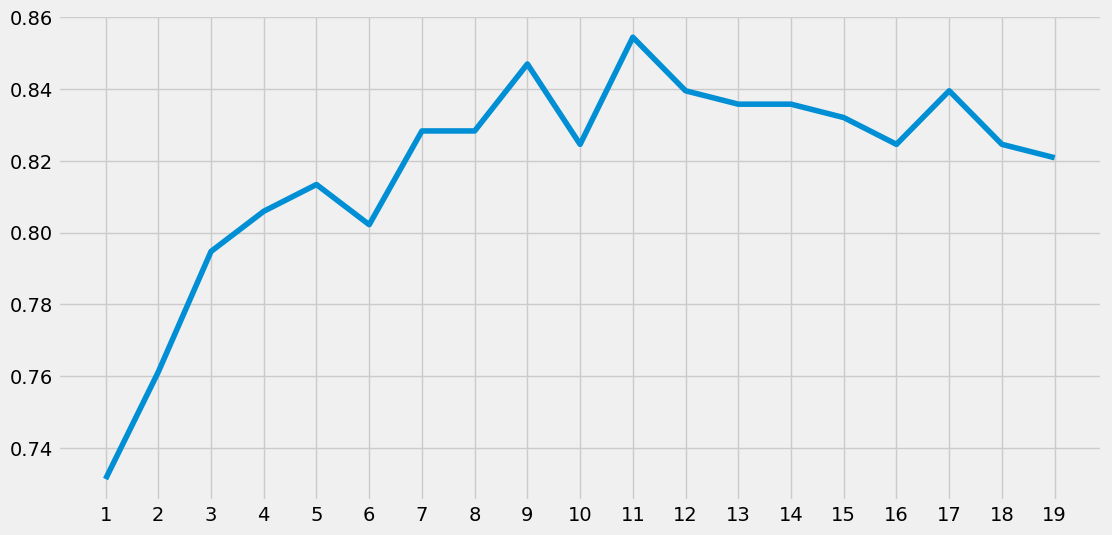

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.82835821 0.84701493 0.82462687 0.85447761 0.83955224
 0.8358209  0.8358209  0.83208955 0.82462687 0.83955224 0.82462687
 0.82089552] with the max value as  0.8544776119402985


In [82]:
a_index = list(range(1, 20, 1))
a = pd.Series()
x = list(range(1, 20))
for i in range(1, 20):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a._append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print("Accuracies for different values of n are:", a.values, "with the max value as ", a.max())

In [83]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print("The accuracy of the NaiveBayes is:", metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is: 0.8134328358208955


In [85]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print("The accuracy of the Random Forest is:", metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forest is: 0.8171641791044776


In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits = 10, random_state = 22, shuffle = True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators = 100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe2

,CV mean,Std
Linear Svm,0.785730,0.059693
Radial Svm,0.828377,0.057096
Logistic Regression,0.800300,0.044429
KNN,0.809263,0.036167
Decision Tree,0.805868,0.038751
Naive Bayes,0.793596,0.055424
Random Forest,0.819338,0.036533


<Axes: >

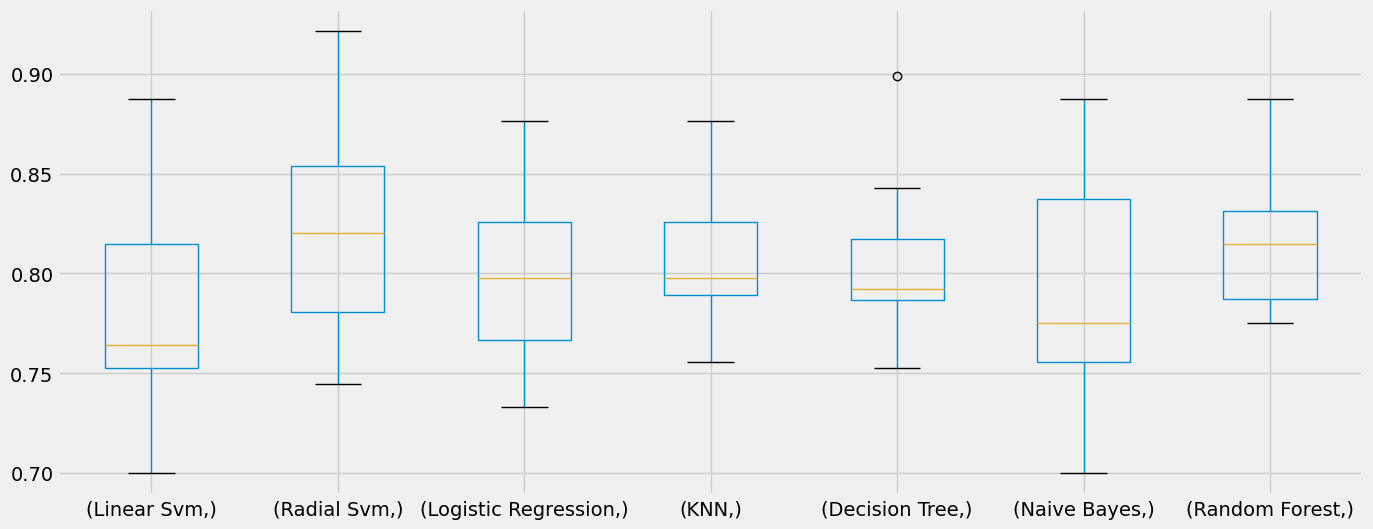

In [97]:
plt.subplots(figsize = (15, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

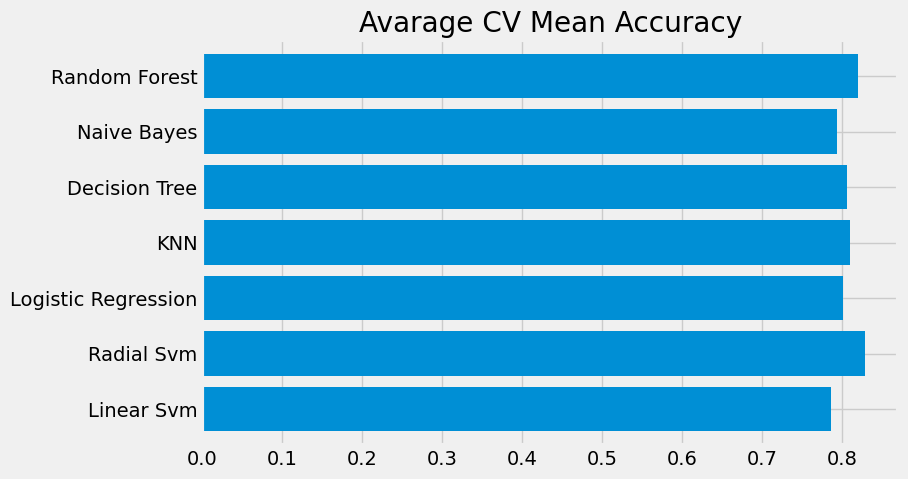

In [99]:
new_models_dataframe2['CV mean'].plot.barh(width = 0.8)
plt.title('Avarage CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

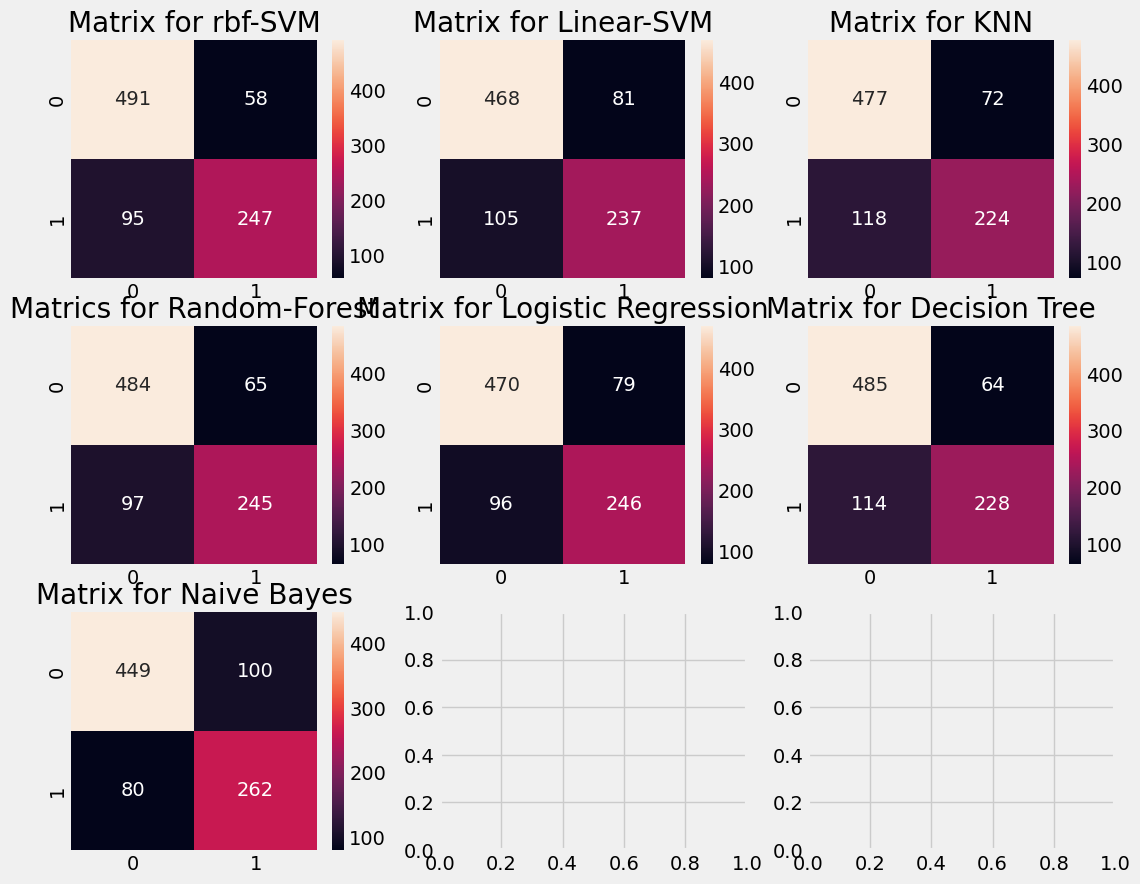

In [103]:
f, ax = plt.subplots(3, 3, figsize = (12, 10))
y_pred = cross_val_predict(svm.SVC(kernel = 'rbf'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 0], annot = True, fmt = '2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel = 'linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 1], annot = True, fmt = '2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 2], annot = True, fmt = '2.0f')
ax[0, 2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1, 0], annot = True, fmt = '2.0f')
ax[1, 0].set_title('Matrics for Random-Forest')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1, 1], annot = True, fmt = '2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[1, 2], annot = True, fmt = '2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[2, 0], annot = True, fmt = '2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.show()

In [105]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator = svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
0.8282593685267716
{'C': 0.6, 'gamma': 0.1, 'kernel': 'rbf'}


In [106]:
print(gd.best_estimator_)

SVC(C=0.6, gamma=0.1)


In [109]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = 4)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.799 total time=   0.3s
[CV 2/5] END ..................n_estimators=100;, score=0.792 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.831 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.792 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.848 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.799 total time=   0.4s
[CV 2/5] END ..................n_estimators=200;, score=0.787 total time=   0.4s
[CV 3/5] END ..................n_estimators=200;, score=0.854 total time=   0.4s
[CV 4/5] END ..................n_estimators=200;, score=0.792 total time=   0.4s
[CV 5/5] END ..................n_estimators=200;, score=0.854 total time=   0.4s
[CV 1/5] END ..................n_estimators=300;, score=0.804 total time=   0.6s
[CV 2/5] END ..................n_estimators=300;,

In [112]:
from sklearn.ensemble import VotingClassifier
ensemble_line_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)),
                                                   ('RBF', svm.SVC(probability = True, kernel = 'rbf', C = 0.5, gamma = 0.1)),
                                                   ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)),
                                                   ('LR', LogisticRegression(C = 0.1)),
                                                   ('DT', DecisionTreeClassifier(random_state = 0)),
                                                   ('NB', GaussianNB()),
                                                   ('svm', svm.SVC(kernel = 'linear', probability = True))
                                                  ],
                                     voting = 'soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_line_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_line_rbf, X, Y, cv = 10, scoring = 'accuracy')
print("The cross validated score is:", cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is: 0.8249188514357053


In [115]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print("The accuracy for bagged KNN is:", metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.8283582089552238
The cross validated score for bagged KNN is: 0.8115480649188515


In [119]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print("The accuracy for bagged Decision Tree is:", metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print("The cross validated score for bagged Decision Tree is:", result.mean())

The accuracy for bagged Decision Tree is: 0.832089552238806
The cross validated score for bagged Decision Tree is: 0.8160174781523096


In [120]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8271660424469414


In [121]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8137827715355804


In [123]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8182771535580524


In [125]:
n_estimators = list(range(100, 1000, 100))
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
hyper = {'n_estimators': n_estimators, 'learning_rate': learning_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = 1)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


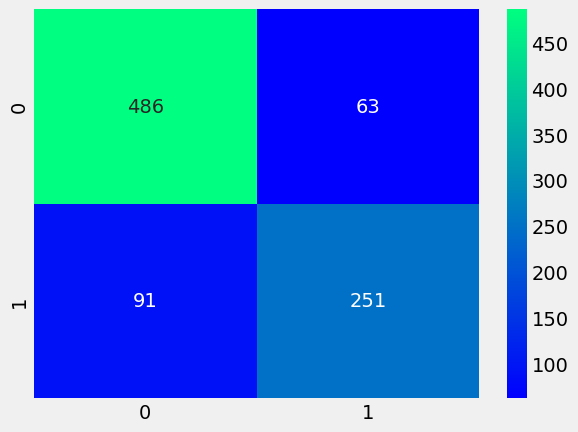

In [127]:
ada = AdaBoostClassifier(n_estimators = 300, learning_rate = 0.05, random_state = 0)
result = cross_val_predict(ada, X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, result), annot = True, cmap = 'winter', fmt = '2.0f')
plt.show()

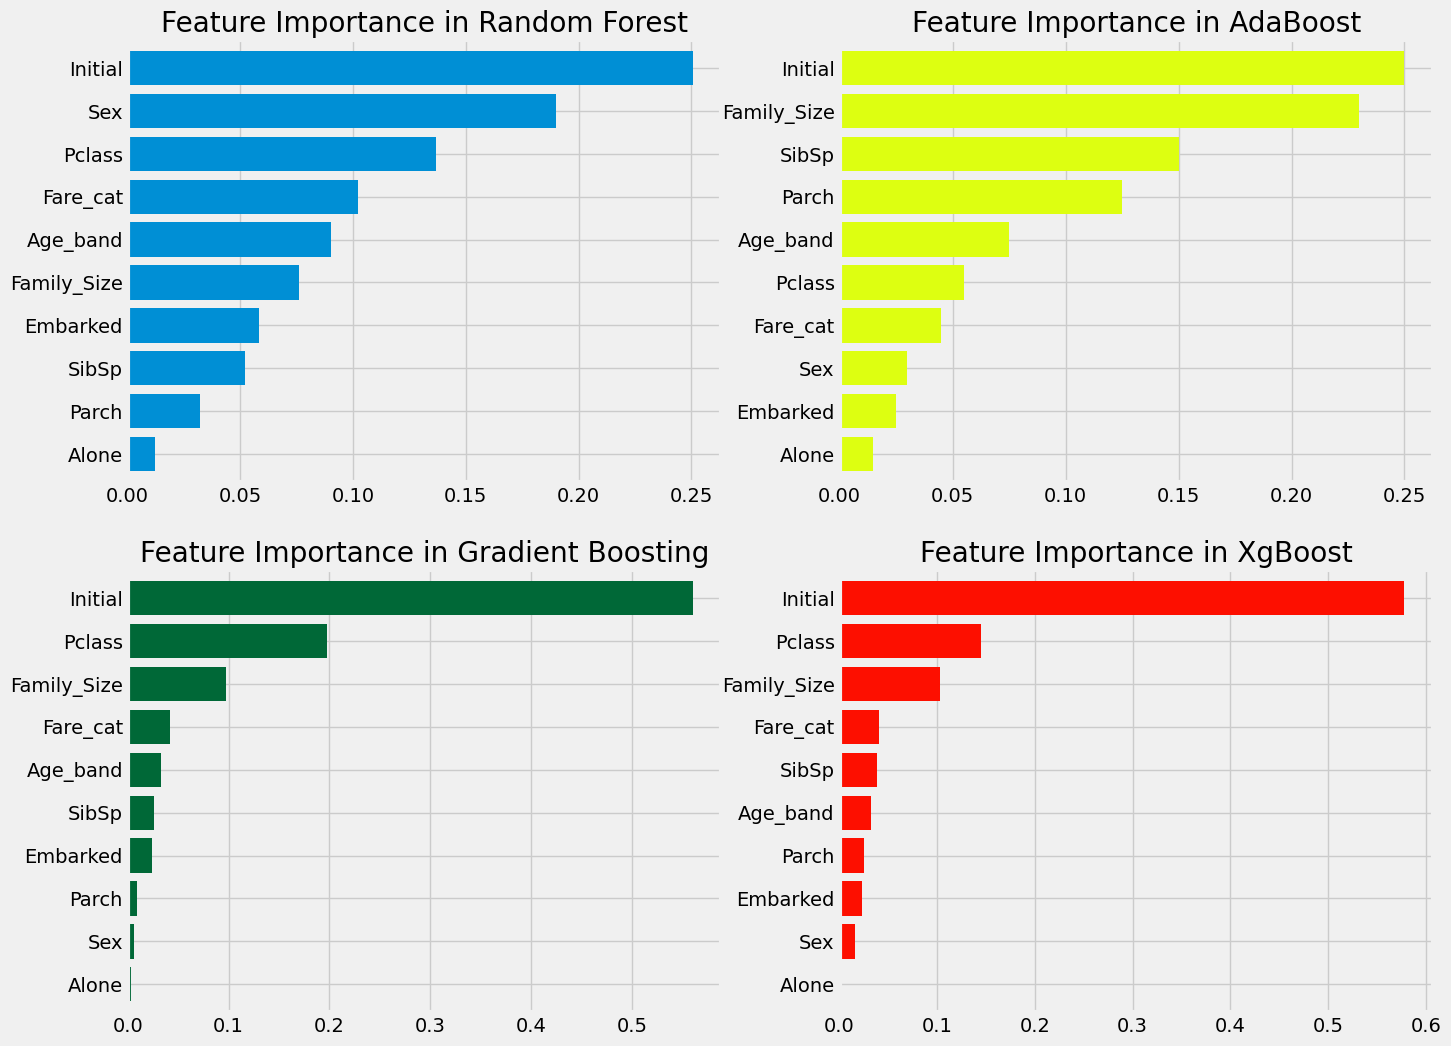

In [134]:
f, ax = plt.subplots(2, 2, figsize = (15, 12))
model = RandomForestClassifier(n_estimators = 500, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forest')
model = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.5, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[0, 1], color = '#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 0], cmap = 'RdYlGn_r')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True).plot.barh(width = 0.8, ax = ax[1, 1], color = '#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show()